In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import io
import sympy as sp


Wellenlänge1, Intensität108= np.loadtxt(r'C:\Users\Justus\Desktop\Fluoreszenz_Daten\pH1_08.csv', skiprows=18, delimiter='\t', unpack=True)
Wellenlänge1, Intensität205= np.loadtxt(r'C:\Users\Justus\Desktop\Fluoreszenz_Daten\pH2_05.csv', skiprows=18, delimiter='\t', unpack=True)
Wellenlänge1, Intensität253= np.loadtxt(r'C:\Users\Justus\Desktop\Fluoreszenz_Daten\pH2_53.csv', skiprows=18, delimiter='\t', unpack=True)
Wellenlänge1, Intensität305= np.loadtxt(r'C:\Users\Justus\Desktop\Fluoreszenz_Daten\pH3_05.csv', skiprows=18, delimiter='\t', unpack=True)
Wellenlänge1, Intensität487= np.loadtxt(r'C:\Users\Justus\Desktop\Fluoreszenz_Daten\pH4_87.csv', skiprows=18, delimiter='\t', unpack=True)
Wellenlänge1, Intensität6320= np.loadtxt(r'C:\Users\Justus\Desktop\Fluoreszenz_Daten\pH6_00_320_nm.csv', skiprows=18, delimiter='\t', unpack=True)
Wellenlänge, Intensität6366= np.loadtxt(r'C:\Users\Justus\Desktop\Fluoreszenz_Daten\pH6_00_366_nm.csv', skiprows=18, delimiter='\t', unpack=True)
Wellenlänge, Intensität690= np.loadtxt(r'C:\Users\Justus\Desktop\Fluoreszenz_Daten\pH6_90.csv', skiprows=18, delimiter='\t', unpack=True)
Wellenlänge, Intensität784= np.loadtxt(r'C:\Users\Justus\Desktop\Fluoreszenz_Daten\pH7_84.csv', skiprows=18, delimiter='\t', unpack=True)
Wellenlänge, Intensität900= np.loadtxt(r'C:\Users\Justus\Desktop\Fluoreszenz_Daten\pH9_00.csv', skiprows=18, delimiter='\t', unpack=True)
Wellenlänge, Intensität964= np.loadtxt(r'C:\Users\Justus\Desktop\Fluoreszenz_Daten\pH9_64.csv', skiprows=18, delimiter='\t', unpack=True)
Wellenlänge, Intensität1039= np.loadtxt(r'C:\Users\Justus\Desktop\Fluoreszenz_Daten\pH10_39.csv', skiprows=18, delimiter='\t', unpack=True)
Wellenlänge, Intensität1266= np.loadtxt(r'C:\Users\Justus\Desktop\Fluoreszenz_Daten\pH12_66.csv', skiprows=18, delimiter='\t', unpack=True)

pH126, Intensität12bis6= np.loadtxt(r'C:\Users\Justus\Desktop\Fluoreszenz_Daten\pH12-6.csv', skiprows=0, delimiter=';', unpack=True)
pH16, Intensität1bis6=  np.loadtxt(r'C:\Users\Justus\Desktop\Fluoreszenz_Daten\pH16.csv', skiprows=0, delimiter=';', unpack=True)
ph14, Intensität1bis4=  np.loadtxt(r'C:\Users\Justus\Desktop\Fluoreszenz_Daten\pH1bis4.csv', skiprows=0, delimiter=';', unpack=True)






Spektren

366nm

302.746 max


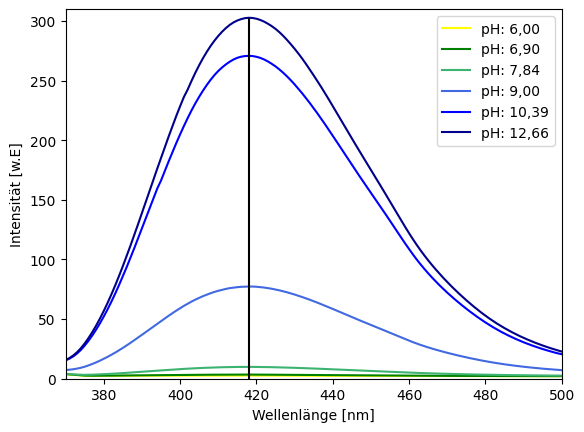

In [10]:
plt.plot(Wellenlänge, Intensität6366,color='yellow', label='pH: 6,00')
plt.plot(Wellenlänge, Intensität690,color='green', label='pH: 6,90')
plt.plot(Wellenlänge, Intensität784,color='mediumseagreen', label='pH: 7,84')
plt.plot(Wellenlänge, Intensität900,color='royalblue', label='pH: 9,00')
plt.plot(Wellenlänge, Intensität1039,color='blue', label='pH: 10,39')
plt.plot(Wellenlänge, Intensität1266,color='darkblue', label='pH: 12,66')

y = max(Intensität1266)
print(y,'max')

plt.vlines(x=418,ymin=-10 ,ymax=y, color='black')

plt.xlabel('Wellenlänge [nm]')
plt.ylabel('Intensität [w.E]')

plt.ylim(0,310)
plt.xlim(370,500)
plt.legend()
plt.show()


235.773 max


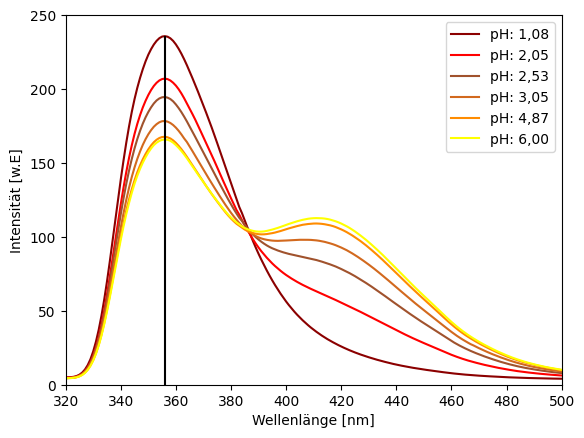

In [9]:
plt.plot(Wellenlänge1, Intensität108,color='darkred', label='pH: 1,08')
plt.plot(Wellenlänge1, Intensität205,color='red', label='pH: 2,05')
plt.plot(Wellenlänge1, Intensität253,color='sienna', label='pH: 2,53')
plt.plot(Wellenlänge1, Intensität305,color='chocolate', label='pH: 3,05')
plt.plot(Wellenlänge1, Intensität487,color='darkorange', label='pH: 4,87')
plt.plot(Wellenlänge1, Intensität6320,color='yellow', label='pH: 6,00')

y = max(Intensität108)
print(y,'max')

plt.vlines(x=356,ymin=0 ,ymax=y,colors='black')

plt.xlabel('Wellenlänge [nm]')
plt.ylabel('Intensität [w.E]')
plt.xlim(320,500)
plt.ylim(0,250)
plt.legend()
plt.show()


pH 12-6

Fit-Parameter: L = 0.9933015539043645, k = 2.2895905542663764, x0 = 9.490922163374309, b=0.009559815716103502
0.00693041369196904 qx0
3.2290728018929114e-10 Ks
5.152911513066108e-12 qKs


C:\Users\Justus\AppData\Local\Temp\ipykernel_7456\482624879.py:5: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-k * (x - x0)))+g


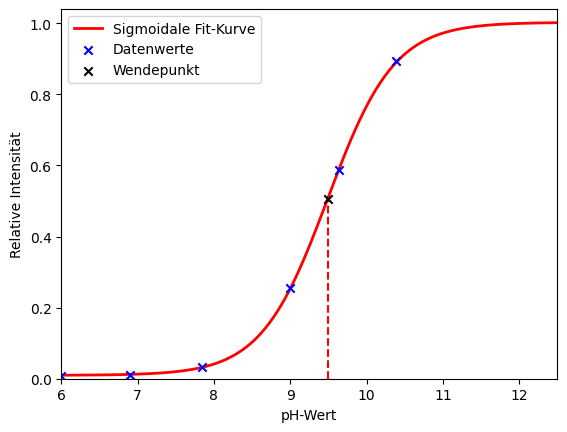

In [11]:
Intensität12bis61=1/max(Intensität12bis6)*Intensität12bis6


def sigmoid(x, L, k, x0,g):
    return L / (1 + np.exp(-k * (x - x0)))+g

x_data = pH126
y_data= Intensität12bis61

initial_guess = [1, 10, 9, 0]
params, covariance = curve_fit(sigmoid, x_data, y_data, p0=initial_guess)
L, k, x0, g = params
print(f'Fit-Parameter: L = {L}, k = {k}, x0 = {x0}, b={g}')

x_fine = np.linspace(6, 13, 1000)


y_fit = sigmoid(x_fine, *params)
plt.plot(x_fine, y_fit, label='Sigmoidale Fit-Kurve', color='red', linewidth=2, zorder=1)
plt.scatter(pH126, Intensität12bis61,color='blue', marker='x' , label='Datenwerte', zorder=2)



zweiteableitung= (-L*k**2*(np.exp(k*(x_fine-x0))-1)*np.exp(k*(x_fine-x0)))/((np.exp(k*(x_fine-x0))+1)**3)

yx0 = [L / (1 + np.exp(-k * (x0 - x0)))+g]
plt.scatter(x0,yx0, marker='x', zorder=3, color='black', label='Wendepunkt')


plt.vlines(x=x0, ymin=0, ymax=yx0, color='red', linestyle='dashed')

errors = np.sqrt(np.diag(covariance))
qL, qk, qx0,qg=errors

print(qx0,'qx0')

Ks=10**(-x0)
print(Ks,'Ks')

qKs=np.sqrt((-(np.log(10)/(10**(x0)))*qx0)**2)
print(qKs,'qKs')


plt.legend()

plt.ylabel('Relative Intensität')
plt.xlabel('pH-Wert')
plt.ylim(0,1.04)
plt.xlim(6,12.5)

plt.legend()
plt.show()

pH 1-6

Fit-Parameter: L = 0.343658914105802, k = -1.7534331141830952, x0 = 2.123039336568612,b=0.7025900578312431
0.14029397145335293 qx0
2.523039336568612 x01
0.0029988908797558304 Ks
0.0009687581330354332 qKs


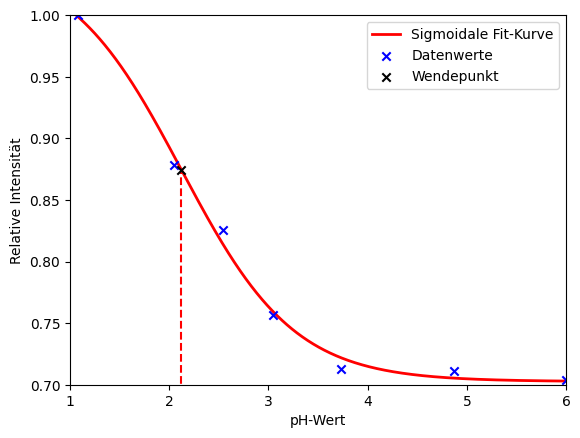

In [12]:
Intensität1bis61=1/max(Intensität1bis6)*Intensität1bis6


def sigmoid(x, L, k, x0,b):
    return L / (1 + np.exp(-k * (x - x0)))+b

x_data = pH16
y_data= Intensität1bis61

initial_guess = [max(y_data), min(y_data), 1, np.median(x_data)]
params, covariance = curve_fit(sigmoid, x_data, y_data, p0=initial_guess)
L, k, x0, b = params
print(f'Fit-Parameter: L = {L}, k = {k}, x0 = {x0},b={b}')

x_fine = np.linspace(1, 6, 1000)


y_fit = sigmoid(x_fine, *params)
plt.plot(x_fine, y_fit, label='Sigmoidale Fit-Kurve', color='red', linewidth=2, zorder=1)
plt.scatter(pH16, Intensität1bis61,color='blue', marker='x' , label='Datenwerte', zorder=2)

plt.scatter(x0,[L / (1 + np.exp(-k * (x0 - x0)))+b], marker='x', zorder=3, color='black', label='Wendepunkt')
yx0 = [L / (1 + np.exp(-k * (x0 - x0)))+b]
plt.vlines(x=x0, ymin=0.5, ymax=yx0, color='red', linestyle='dashed')

errors = np.sqrt(np.diag(covariance))
qL, qk, qx0,qb=errors

print(qx0,'qx0')

#Siehe seite 6 skript
x01= x0+0.4
print(x01,'x01')
Ks=10**(-x01)
print(Ks,'Ks')

qKs=np.sqrt(((-np.log(10)/(10**(x01)))*qx0)**2)
print(qKs,'qKs')



plt.legend()

plt.ylabel('Relative Intensität')
plt.xlabel('pH-Wert')
plt.ylim(0.7,1)
plt.xlim(1,6)
plt.show()

Lineare Regression

Fit-Parameter: m = 524.2132634758864, t = 2.6939427634643893
64.80708693096302 Fehler m
0.3049713392836516 Fehler T
33745739.56878821 k2
3820230.9013335863 qk2
0.001387360408339194 K2
0.00017151566519253163 qK2
24323700868.1725 kneg2
4077350814.425342 qkneg2


C:\Users\Justus\AppData\Local\Temp\ipykernel_7456\3127987665.py:7: RuntimeWarning: divide by zero encountered in divide
  I1= 1/((max(Intensität1bis4)/Intensität1bis4)-1)


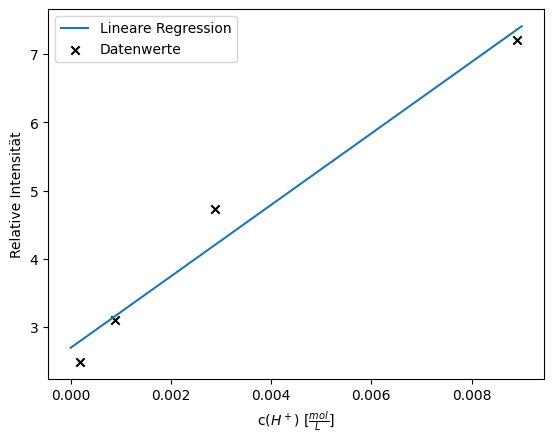

In [6]:

cH14= 10**(-ph14)

tau=1.1*10**(-8)
tauneg=0.8*10**(-8)


I1= 1/((max(Intensität1bis4)/Intensität1bis4)-1)

I2  = I1[np.isfinite(I1)]

CH14 = cH14[:-1]

def linear(x,m,t):
    return m*x+t


params1, covariance1 = curve_fit(linear, CH14, I2, p0=[100,1])
m,t = params1
print(f'Fit-Parameter: m = {m}, t = {t}')
errors = np.sqrt(np.diag(covariance1))
m_err, t_err = errors

print(m_err,'Fehler m')
print(t_err,'Fehler T')

x= np.linspace(0, 0.009, 1000)
y= m*x+t


k2= 1/(tau*t)

print(k2,'k2')

qk2=np.sqrt((-1/(tau*t**2)*t_err)**2)
print(qk2,'qk2')



K2= tauneg/(tau*m)

print(K2,'K2')

qK2=np.sqrt((-tauneg/(tau*m**2)*m_err)**2)
print(qK2,'qK2')



kneg2= k2/K2

print(kneg2,'kneg2')

qkneg2=np.sqrt((((1/K2)*qk2)**2) + (((-k2/K2**2)*qK2)**2))
print(qkneg2,'qkneg2')





plt.plot(x,y, label='Lineare Regression')


plt.scatter(CH14,I2, marker='x',label='Datenwerte',color='black')

plt.ticklabel_format(axis="x", style="plain", scilimits=(-3,-3))

plt.ylabel('Relative Intensität')
plt.xlabel(r'c($H^+$) [$\frac{mol}{L}$]')

plt.legend()
plt.show()


